In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [2]:
filename = "Page1"
im = Image.open("./sprite_originals/" + filename + ".png") #Can be many different formats.
im = im.convert("1")

w,h = im.size
(left, top, right, bottom) = ( int(w/5), int(h/5), int(w*4/5), int(h*4/5) )
im = im.crop((left, top, right, bottom)) 
newh = 80
neww = int(newh/h*w)
print(neww)
im = im.resize( (neww, newh) )

56


In [3]:
datawidth = neww
outFile = open("./sprite_bytes/" + filename + '.txt', 'w')
for y in range(im.size[1]):
    outFile.write("%d'b" %datawidth)
    for x in range(im.size[0]):
        pixel = im.getpixel((x,y))
        if pixel == 255:
            pix = 0
        else:
            pix = 1
        outFile.write("%x" %pix)
    outFile.write(",\n")
outFile.close()

In [4]:
# Page1.png --> Page9.png

outFile = open("./sprite_bytes/" + 'stickman' + '.txt', 'w')

outFile.write("// height: %d, width: %d" %(newh,neww))

for i in range(1,10):
    
    filename = "Page" + str(i)
    im = Image.open("./sprite_originals/" + filename + ".png") #Can be many different formats.
    im = im.convert("1")

    w,h = im.size
    (left, top, right, bottom) = ( int(w/5), int(h/5), int(w*4/5), int(h*4/5) )
    im = im.crop((left, top, right, bottom)) 
    newh = 120
    neww = int(newh/h*w)
    print(neww)
    im = im.resize( (neww, newh) )
    
    
    # write txt
    datawidth = neww
    outFile.write("\n//Page %d\n" %i)
    for y in range(im.size[1]):
        outFile.write("%d'b" %datawidth)
        for x in range(im.size[0]):
            pixel = im.getpixel((x,y))
            if pixel == 255:
                pix = 0
            else:
                pix = 1
            outFile.write("%x" %pix)
        outFile.write(",\n")

outFile.close()

84
84
84
84
84
84
84
84
84


(638, 476)


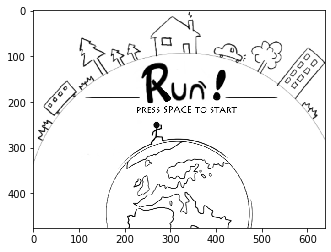

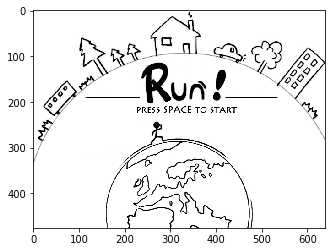

In [18]:
filename = "cover.jpg"
im = Image.open("./sprite_originals/" + filename)
im = im.convert("L")
plt.figure()
plt.imshow(im, 'gray')
print(im.size)

pixels = im.load()
for y in range(im.size[1]):
    for x in range(im.size[0]):
        pixels[x,y] -= 100
        if pixels[x,y] < 0:
            pixels[x,y] = 0

plt.figure()
plt.imshow(im, 'gray')

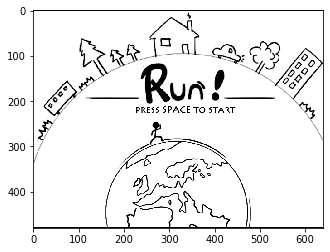

In [19]:
new = Image.new('L', (640, 480), color=0 )
new_pixels = new.load()
for y in range(2, new.size[1]-2):
    for x in range(1, new.size[0]-1):
        new_pixels[x,y] = pixels[x-1, y-2]

plt.figure()
plt.imshow(new, 'gray')

In [20]:
# im = im.resize( (640, 480) )
# plt.figure()
# plt.imshow(im, 'gray')

In [29]:
outFile = open("./sprite_bytes/" + filename + '.txt', 'w')
for y in range(new.size[1]):
    outFile.write("\n")
    for x in range(new.size[0]):
        pixel = new.getpixel((x,y))
        outFile.write("8'h%x, " %pixel)
outFile.close()